# data processing

In [1]:
import os, copy
from datetime import datetime as dt

import numpy as np
import pandas as pd
from tqdm import tqdm

# load data

In [2]:
train_df = pd.read_csv('open/train.csv')
print(train_df.shape)
train_df.head()

(871393, 10)


,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book


In [3]:
test_df = pd.read_csv('open/test.csv')
print(test_df.shape)
test_df.head()

(159621, 9)


,ID,User-ID,Book-ID,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TEST_000000,USER_00008,BOOK_047966,37.0,"vermilion, ohio, usa",Birds of Prey: A Novel of Suspense,J.A. Jance,2002.0,Avon
1,TEST_000001,USER_00008,BOOK_119494,37.0,"vermilion, ohio, usa",Midnight Voices,JOHN SAUL,2003.0,Ballantine Books
2,TEST_000002,USER_00008,BOOK_151775,37.0,"vermilion, ohio, usa",Breaking Free : A Prescription for Personal an...,David M. Noer,1996.0,Jossey-Bass
3,TEST_000003,USER_00008,BOOK_176255,37.0,"vermilion, ohio, usa",Bitter Harvest,Ann Rule,1999.0,Pocket
4,TEST_000004,USER_00008,BOOK_187307,37.0,"vermilion, ohio, usa",Embraced by the Light,Betty J. Eadie,1994.0,Bantam Books


# Get train, test array

In [4]:
train_df

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,0,34.0,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins
871389,TRAIN_871389,USER_92097,BOOK_258124,0,35.0,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony
871390,TRAIN_871390,USER_92098,BOOK_071848,0,45.0,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press
871391,TRAIN_871391,USER_92099,BOOK_252599,8,43.0,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr


## 유저 정보

### 나이

In [5]:
Age_scaled = train_df['Age'].apply(lambda x: x if x <= 100 else np.nan)
user_mean = Age_scaled.mean()
print(user_mean)
train_df['Age_scaled'] = Age_scaled.fillna(user_mean)

36.49875233074745


In [6]:
test_df['Age_scaled'] = test_df['Age'].apply(lambda x: x if x <= 100 else np.nan).fillna(user_mean)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

train_age = scaler.fit_transform(train_df[['Age_scaled']])
test_age = scaler.transform(test_df[['Age_scaled']])

train_age.shape, test_age.shape

((871393, 1), (159621, 1))

### 국가

In [9]:
user_df = train_df[['User-ID', 'Age', 'Location']].drop_duplicates('User-ID', keep='first')
print(user_df.shape)
user_df.head()

(83256, 3)


,User-ID,Age,Location
0,USER_00000,23.0,"sackville, new brunswick, canada"
8,USER_00001,35.0,"wake forest, north carolina, usa"
11,USER_00002,35.0,"minneapolis, minnesota, usa"
12,USER_00003,24.0,"magdeburg, sachsen-anhalt, germany"
34,USER_00004,35.0,"new york, new york, usa"


In [10]:
user_df['Country'] = user_df['Location'].apply(lambda x: x.split(',')[-1])

In [11]:
len(user_df['Country'].unique())

244

In [12]:
import string

# 제거할 문장부호
punctuations = string.punctuation

# 문장부호가 제거된 문자열을 반환하는 함수
def remove_punctuations(text):
    result = ''
    if not pd.isna(text):
        result = ''.join(char for char in text if char not in punctuations)
    return result

In [13]:
user_df['Country'] = user_df['Country'].str.strip().replace('', np.nan).replace('n/a', np.nan).replace('nan', np.nan)
user_df['Country'] = user_df['Country'].apply(lambda x: remove_punctuations(x))
user_df['Country'] = user_df['Country'].str.strip().replace('', np.nan)

In [14]:
countries = user_df['Country'].value_counts()[user_df['Country'].value_counts() > 10].index
countries

Index(['usa', 'canada', 'germany', 'united kingdom', 'australia', 'spain',
       'italy', 'france', 'new zealand', 'switzerland', 'netherlands',
       'portugal', 'austria', 'malaysia', 'sweden', 'finland', 'ireland',
       'singapore', 'brazil', 'belgium', 'denmark', 'argentina', 'philippines',
       'mexico', 'japan', 'norway', 'israel', 'india', 'china', 'south africa',
       'poland', 'greece', 'romania', 'south korea', 'luxembourg', 'turkey',
       'hong kong', 'chile', 'costa rica', 'iran', 'slovenia',
       'czech republic', 'iceland', 'indonesia', 'egypt', 'bulgaria',
       'croatia', 'hungary', 'taiwan', 'united states', 'slovakia'],
      dtype='object', name='Country')

united states -> usa

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
encoder = OneHotEncoder(categories=[list(countries.values)], handle_unknown='ignore')

In [17]:
def preproc_location_to_country(location):
    country = location.split(',')[-1].strip()
    if not pd.isna(country):
        if country in ['', 'n/a', 'nan']:
            country = np.nan
        country = remove_punctuations(country).strip()
        if country in ['', 'n/a', 'nan']:
            country = np.nan
    return country

In [18]:
train_df['Country'] = train_df['Location'].apply(lambda x: preproc_location_to_country(x))
test_df['Country'] = test_df['Location'].apply(lambda x: preproc_location_to_country(x))

In [19]:
train_df[['Country']].values

array([['canada'],
       ['canada'],
       ['canada'],
       ...,
       ['canada'],
       ['usa'],
       ['italy']], dtype=object)

In [20]:
train_countries = encoder.fit_transform(train_df[['Country']]).toarray()
test_countries = encoder.transform(test_df[['Country']]).toarray()

train_countries.shape, test_countries.shape

((871393, 51), (159621, 51))

## 도서 정보

In [21]:
book_df = train_df[['Book-ID', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Book-Rating']].drop_duplicates('Book-ID', keep='first')
print(book_df.shape)
book_df.head()

(243441, 6)


,Book-ID,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating
0,BOOK_044368,Road Taken,Rona Jaffe,2001.0,Mira,8
1,BOOK_081205,Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books,8
2,BOOK_086781,Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books,0
3,BOOK_098622,Mother Earth Father Sky,Sue Harrison,1991.0,Avon,0
4,BOOK_180810,She Who Remembers,Linda Lay Shuler,1989.0,Signet Book,8


## 100개 이상의 책이 있는 출판사

In [22]:
publishers = book_df['Publisher'].value_counts()[book_df['Publisher'].value_counts() > 100].index
publishers

Index(['Harlequin', 'Silhouette', 'Pocket', 'Ballantine Books', 'Bantam Books',
       'Scholastic', 'Simon &amp; Schuster', 'Penguin Books',
       'Berkley Publishing Group', 'Warner Books',
       ...
       'Diogenes', 'Droemer Knaur', 'Thorsons Publishers', 'Faber &amp; Faber',
       'Flammarion', 'Fawcett', 'Dorling Kindersley', 'Scholastic Library Pub',
       'G. P. Putnam's Sons', 'Rutledge Hill Press'],
      dtype='object', name='Publisher', length=368)

In [23]:
encoder = OneHotEncoder(categories=[list(publishers.values)], handle_unknown='ignore')

train_publisher = encoder.fit_transform(train_df[['Publisher']]).toarray()
test_publisher = encoder.transform(test_df[['Publisher']]).toarray()

train_publisher.shape, test_publisher.shape

((871393, 368), (159621, 368))

## 100개 이상의 책을 낸 작가

In [24]:
authors = book_df['Book-Author'].value_counts()[book_df['Book-Author'].value_counts() > 100].index
authors

Index(['Agatha Christie', 'William Shakespeare', 'Stephen King',
       'Ann M. Martin', 'Francine Pascal', 'Carolyn Keene', 'Isaac Asimov',
       'Barbara Cartland', 'Nora Roberts', 'Charles Dickens', 'R. L. Stine',
       'Not Applicable (Na )', 'Piers Anthony', 'Mark Twain',
       'Marion Zimmer Bradley', 'Jane Austen', 'Terry Pratchett',
       'Mary Higgins Clark', 'Franklin W. Dixon', 'Janet Dailey', 'Roald Dahl',
       'Dick Francis', 'Anne McCaffrey', 'J. R. R. Tolkien', 'Tom Clancy',
       'Nathaniel Hawthorne', 'John Steinbeck', 'Danielle Steel',
       'Diana Palmer', 'Fern Michaels', 'Enid Blyton', 'Sandra Brown',
       'Don Pendleton', 'Ed McBain', 'L. Frank Baum', 'R.L. Stine',
       'Jim Davis', 'Jayne Ann Krentz', 'Andre Norton', 'Stan Berenstain',
       'John Grisham', 'Elmore Leonard', 'James A. Michener', 'C. S. Lewis',
       'Orson Scott Card', 'Robert Ludlum', 'Oscar Wilde',
       'Robert Louis Stevenson', 'Beatrix Potter', 'Jack Canfield',
       'Alan De

In [25]:
encoder = OneHotEncoder(categories=[list(authors.values)], handle_unknown='ignore')

train_author = encoder.fit_transform(train_df[['Book-Author']]).toarray()
test_author = encoder.transform(test_df[['Book-Author']]).toarray()

train_author.shape, test_author.shape

((871393, 85), (159621, 85))

## 책 제목 임베딩

## 단어 토큰화

In [26]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [27]:
def preproc_title(title):
    # remove noise
    tokenizer = RegexpTokenizer("[\w']+")
    tokens = tokenizer.tokenize(title.lower())
    # print(tokens)

    # remove stopwords
    english_stops = set(stopwords.words('english'))
    result = [word for word in tokens if word not in english_stops]
    # print(result)
    
    # stemming
    stemmer = PorterStemmer()
    stemmed_result = [stemmer.stem(token) for token in result]
    # print(stemmed_result)
    
    return stemmed_result


In [28]:
train_titles = []
for title in tqdm(train_df['Book-Title']):
    train_titles.append(preproc_title(title))

100%|██████████| 871393/871393 [02:58<00:00, 4871.77it/s]


In [29]:
test_titles = []
for title in tqdm(test_df['Book-Title']):
    test_titles.append(preproc_title(title))

100%|██████████| 159621/159621 [00:33<00:00, 4809.32it/s]


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-05-07 14:45:16.825867: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 14:45:16.969115: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-07 14:45:17.625184: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64:/usr/loca

In [31]:
max_words = 300
maxlen = 40

tokenizer = Tokenizer(num_words=max_words, oov_token='UNK')
tokenizer.fit_on_texts(train_titles)


In [32]:
train_title = tokenizer.texts_to_sequences(train_titles)
train_title = pad_sequences(train_title, maxlen=maxlen, truncating='pre')

In [33]:
test_title = tokenizer.texts_to_sequences(test_titles)
test_title = pad_sequences(test_title, maxlen=maxlen, truncating='pre')

In [34]:
train_title.shape, test_title.shape

((871393, 40), (159621, 40))

위와 같은 과정이 필요하다. train, test 모두

# define train test data

In [35]:
train_X = np.concatenate([train_age, train_countries, train_author, train_publisher, train_title], axis=-1)
train_X.shape

(871393, 545)

In [36]:
test_X = np.concatenate([test_age, test_countries, test_author, test_publisher, test_title], axis=-1)
test_X.shape

(159621, 545)

In [37]:
train_y = train_df[['Book-Rating']].values

# Train models

In [38]:
import tensorflow as tf

In [39]:
def build_custom_model(input_dims, alpha):
    # define input tensor
    input_layer = tf.keras.Input(shape=input_dims, dtype=tf.float32)

    # # hidden layer
    # x = tf.keras.layers.Dense(
    #     1024, activation='relu', 
    #     kernel_regularizer=tf.keras.regularizers.l2(alpha))(input_layer)

    # hidden layer
    x = tf.keras.layers.Dense(
        256, activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(alpha))(input_layer)
    
    # hidden layer
    x = tf.keras.layers.Dense(
        128, activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(alpha))(x)

    # hidden layer
    x = tf.keras.layers.Dense(
        64, activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(alpha))(x)
    
    # hidden layer
    x = tf.keras.layers.Dense(
        32, activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(alpha))(x)
    
    # output layer
    x = tf.keras.layers.Dense(1, activation='linear')(x)

    model = tf.keras.Model(input_layer, x)

    return model

In [50]:
learning_rate = 0.0001
batch_size = 1000
epochs = 200
alpha = 0.005

In [51]:
mirrored_strategy = tf.distribute.MirroredStrategy()

with mirrored_strategy.scope():
    model = build_custom_model(input_dims=train_X.shape[1:], alpha=alpha)

    # define optimizer Adam
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # model compile
    model.compile(optimizer=optimizer, loss='mse', metrics='mse')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [52]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 545)]             0         
                                                                 
 dense_10 (Dense)            (None, 256)               139776    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 183,041
Trainable params: 183,041
Non-trainab

In [53]:
history = model.fit(train_X, train_y, validation_split=.1, epochs=epochs, batch_size=batch_size)

Epoch 1/200
785/785 [==============================] - 10s 8ms/step - loss: 18.7528 - mse: 16.6321 - val_loss: 16.5852 - val_mse: 14.9727
Epoch 2/200
785/785 [==============================] - 4s 6ms/step - loss: 16.3995 - mse: 14.9048 - val_loss: 16.2179 - val_mse: 14.7983
Epoch 3/200
785/785 [==============================] - 4s 5ms/step - loss: 16.0985 - mse: 14.7242 - val_loss: 15.9996 - val_mse: 14.6655
Epoch 4/200
785/785 [==============================] - 4s 5ms/step - loss: 15.9505 - mse: 14.6502 - val_loss: 15.8598 - val_mse: 14.5921
Epoch 5/200
785/785 [==============================] - 4s 5ms/step - loss: 15.8441 - mse: 14.6049 - val_loss: 15.7816 - val_mse: 14.5698
Epoch 6/200
785/785 [==============================] - 4s 6ms/step - loss: 15.7589 - mse: 14.5719 - val_loss: 15.7101 - val_mse: 14.5482
Epoch 7/200
785/785 [==============================] - 4s 6ms/step - loss: 15.6876 - mse: 14.5475 - val_loss: 15.6640 - val_mse: 14.5460
Epoch 8/200
785/785 [===================

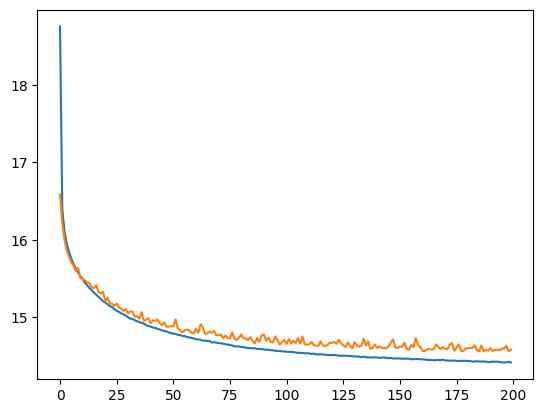

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [55]:
train_pred = model.predict(train_X)
train_pred

27232/27232 [==============================] - 56s 2ms/step


array([[2.1950505],
       [4.4594   ],
       [3.4055123],
       ...,
       [4.846636 ],
       [2.244918 ],
       [3.3953724]], dtype=float32)

In [56]:
test_pred = model.predict(test_X)

4989/4989 [==============================] - 10s 2ms/step


In [57]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(train_y, train_pred, squared=False)
rmse

3.773722101525388

# store result

In [58]:
sample_submission_df = pd.read_csv("open/sample_submission.csv")
sample_submission_df

,ID,Book-Rating
0,TEST_000000,0
1,TEST_000001,0
2,TEST_000002,0
3,TEST_000003,0
4,TEST_000004,0
...,...,...
159616,TEST_159616,0
159617,TEST_159617,0
159618,TEST_159618,0
159619,TEST_159619,0


In [59]:
mname = 'title-wordembed2'

In [60]:
def make_report(template, test_pred, mname):
    template['Book-Rating'] = test_pred
    now = dt.strftime(dt.now(), '%y-%m-%d')
    template.to_csv(f'results/{mname}-{now}.csv', index=False)
    
make_report(sample_submission_df, test_pred, mname)